# Introduction

## Install Dependencies

In [1]:
!pip install -U statsmodels

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

## Load & Prepare Data

In [3]:
def load_binance_pair_from_file(data_path: str) -> pd.DataFrame:
    data = pd.read_json(data_path)
    data.columns = ['time', 'open', 'high', 'low', 'close', 'volume']
    data['time'] = pd.to_datetime(data['time'], unit='ms')
    data.set_index('time',inplace=True)
    
    return data.asfreq(freq='1H')

In [4]:
data = load_binance_pair_from_file('C:\\dev\\P\\fa.services.plutus\\user_data\\data\\binance\\DOGE_BTC-1h.json')

## Visualize Data

<AxesSubplot:xlabel='time'>

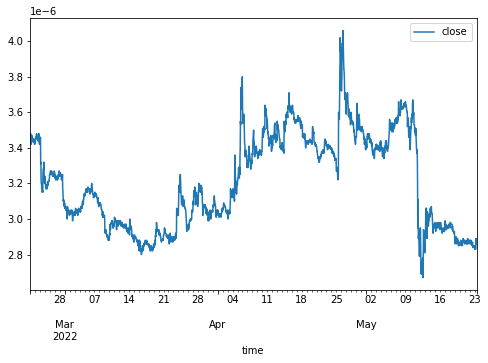

In [5]:
data['close'].plot(figsize=(8,5), legend=True)

# Seasonal Decomposition
- Basically split data into different groups (trends, seasonality and errors).
  - Trend - Most consistent line.
  - Seasonality - Somewhat consistent.
  - Error - Not consistent at all (no trend).

- Seasonality
  - Additive (absolute values)
  - Multiplicative (percentage values)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

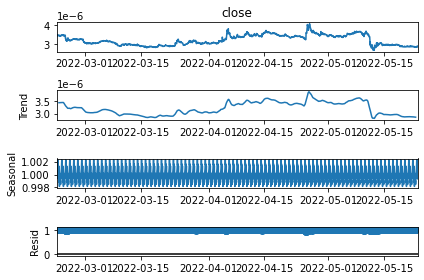

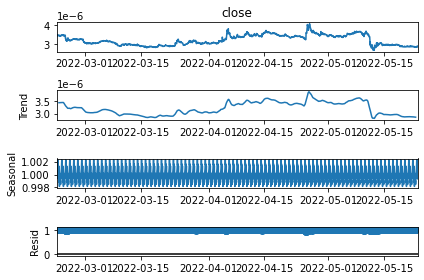

In [6]:
decomposition = seasonal_decompose(x=data.close, model='multiplicative')
decomposition.plot()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (12).

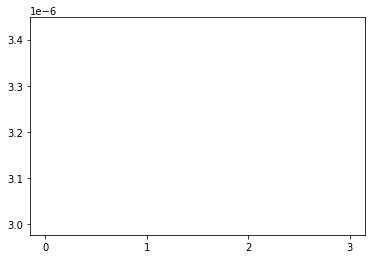

In [7]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

month_plot(data.close.resample(rule='MS').mean())
quarter_plot(data.close.resample(rule='Q').mean())

# Holt-Winters (Tripple Exponential Smoothing)
A specialized exponential smoothing mechanism (Older data has less value).

## Exponential Smoothing
- Split timeseries data into 3 sets.
  - Level
  - Trend
  - Seasonality
- Perform exponential smoothing on all of the above.
- Manually figure out if we're using additive or multiplicative mechanisms.

In [32]:
# Training & Test Sets
test_hours = 10 * 24 # Days * hours in the day, to get the hourly value.
training_set = data.iloc[:-test_hours, :]
test_set = data.iloc[-test_hours:, :]

print(training_set.shape)
print(test_set.shape)

(1931, 5)
(240, 5)


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [34]:
# Forecasting model.
model = ExponentialSmoothing(
    endog=training_set.close, 
    trend='mul', 
    seasonal='mul').fit()

c:\Users\divanma\.conda\envs\windows-ml-station\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [37]:
# Predictions.
predictions_hw = model.forecast(steps=len(test_set)).rename('HW')

<AxesSubplot:xlabel='time'>

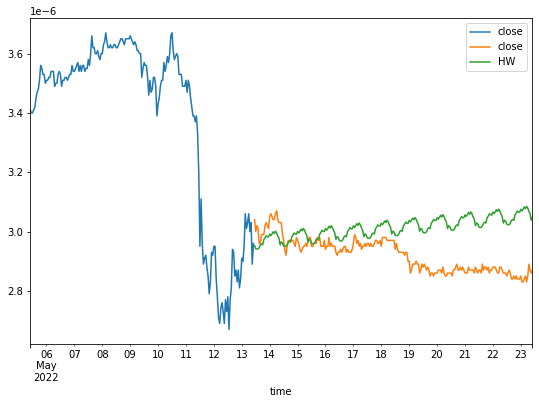

In [48]:
# Visualization
last_count_training_data_to_visualize = -(round(len(training_set)/10))
training_set['close'][last_count_training_data_to_visualize:].plot(figsize=(9,6), legend=True)
test_set['close'].plot(legend=True)
predictions_hw.plot(legend=True)